# This jupyter notebook is prepared by Simon Tran.

# 1. Load Data and perform basic EDA (4pts total)

### 1.1 import libraries: numpy, pandas, matplotlib.pyplot, seaborn, sklearn (1pt)

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### 1.2 Upload the dataset to your Google Drive, then using the following code, import the data to a pandas dataframe and show the count of rows and columns (0.5pt)

In [272]:
from google.colab import drive

drive.mount('/content/drive')
file_name = 'drive/My Drive/Colab Notebooks/hr_data_.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
    df = pd.read_csv(file)

print("Rows: ", len(df.axes[0]))
print("Columns: ", len(df.columns))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Rows:  8955
Columns:  15


### 1.3 Show the top 7 and bottom 7 rows (0.5pt)

In [273]:
df.head(7)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
5,12,25619,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,1000-4999,Pvt Ltd,3,23,0.0
6,15,6588,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,16.0,10/49,Pvt Ltd,>4,18,0.0


In [274]:
df.tail(7)

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8948,19143,33047,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,10000+,Pvt Ltd,>4,18,0.0
8949,19146,13167,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,500-999,Pvt Ltd,1,51,0.0
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


### 1.4 Show if any column has null values (0.5pt)

In [275]:
df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

### 1.5 Show/Plot the count of unique target labels and discuss its imbalances and possible issues in using it for classification. (1.5pt)

<AxesSubplot:xlabel='target', ylabel='count'>

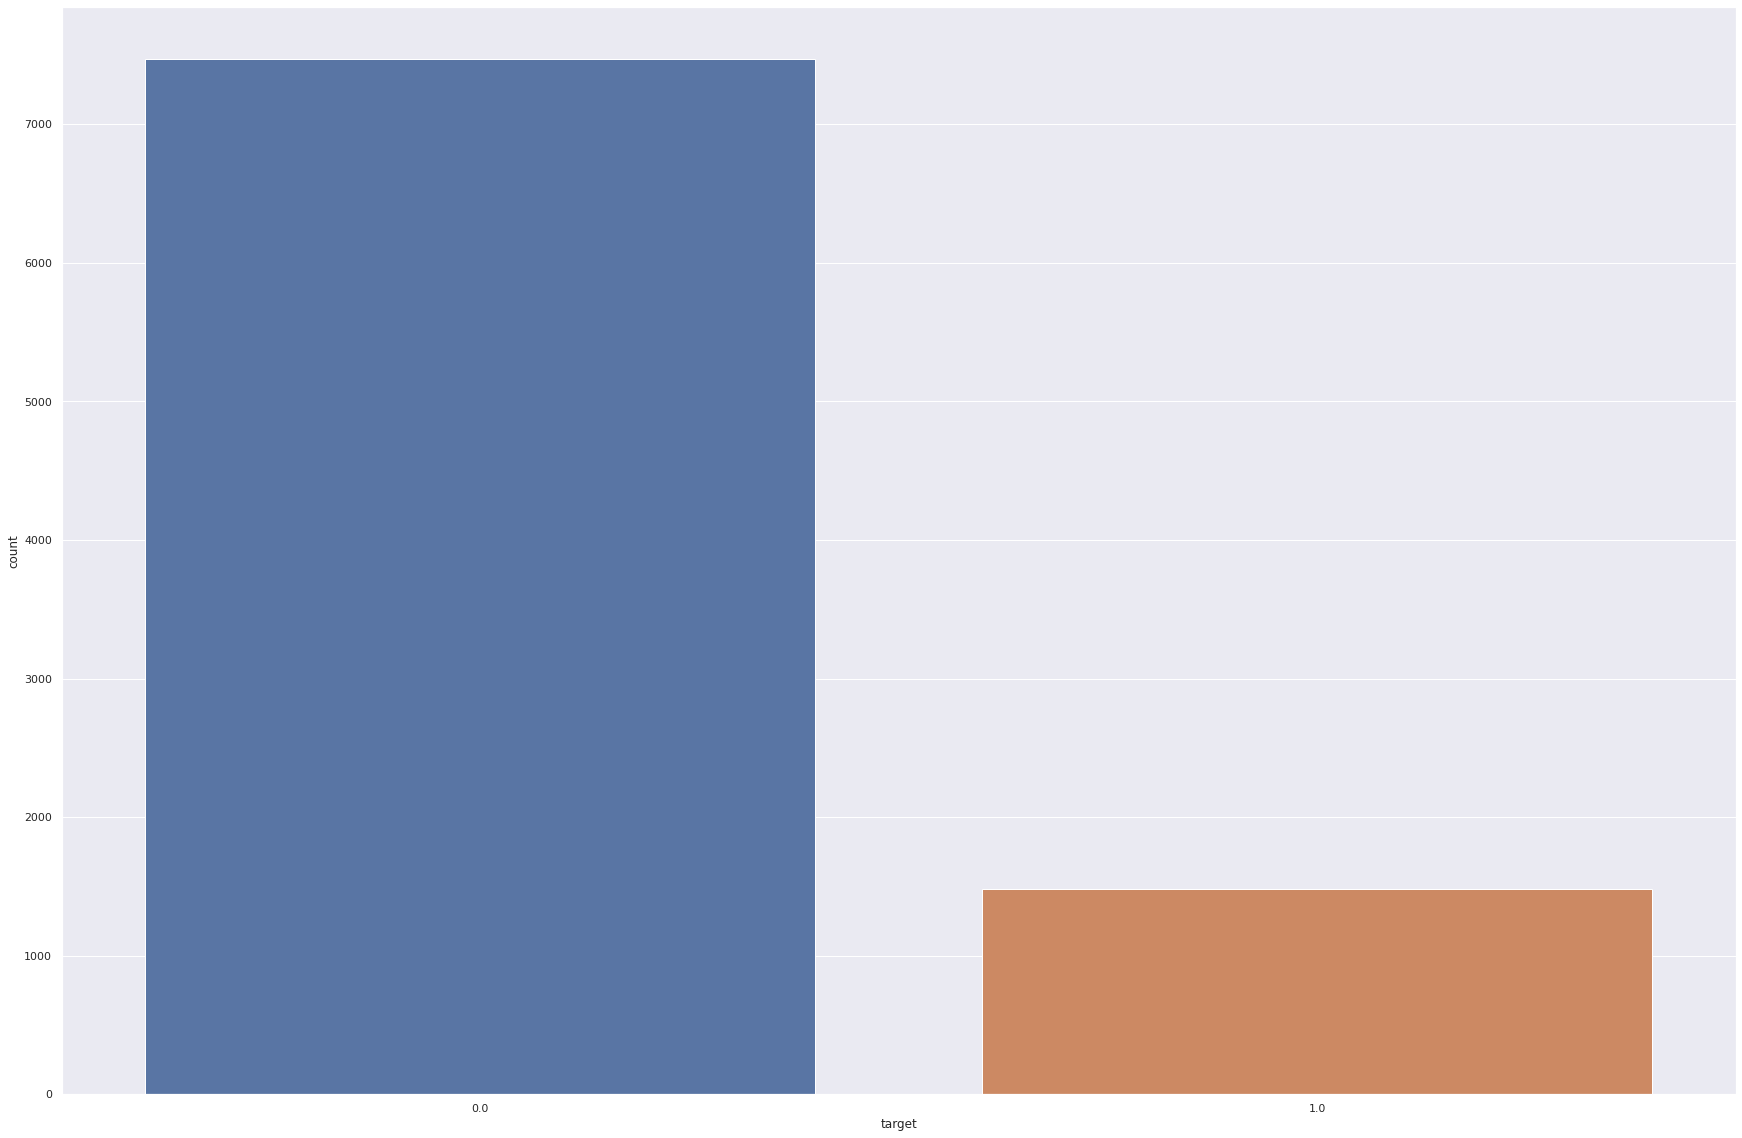

In [276]:
sns.countplot(x = df['target'])

# 2. Feature Selection and Pre-processing (25 pts total)

## 2.1 Preprocessing City (1+1+1+1 = 4pts total)

### 2.1.1 Plot no. of records per city so that the highest city counts are shown in descending order (1pt)

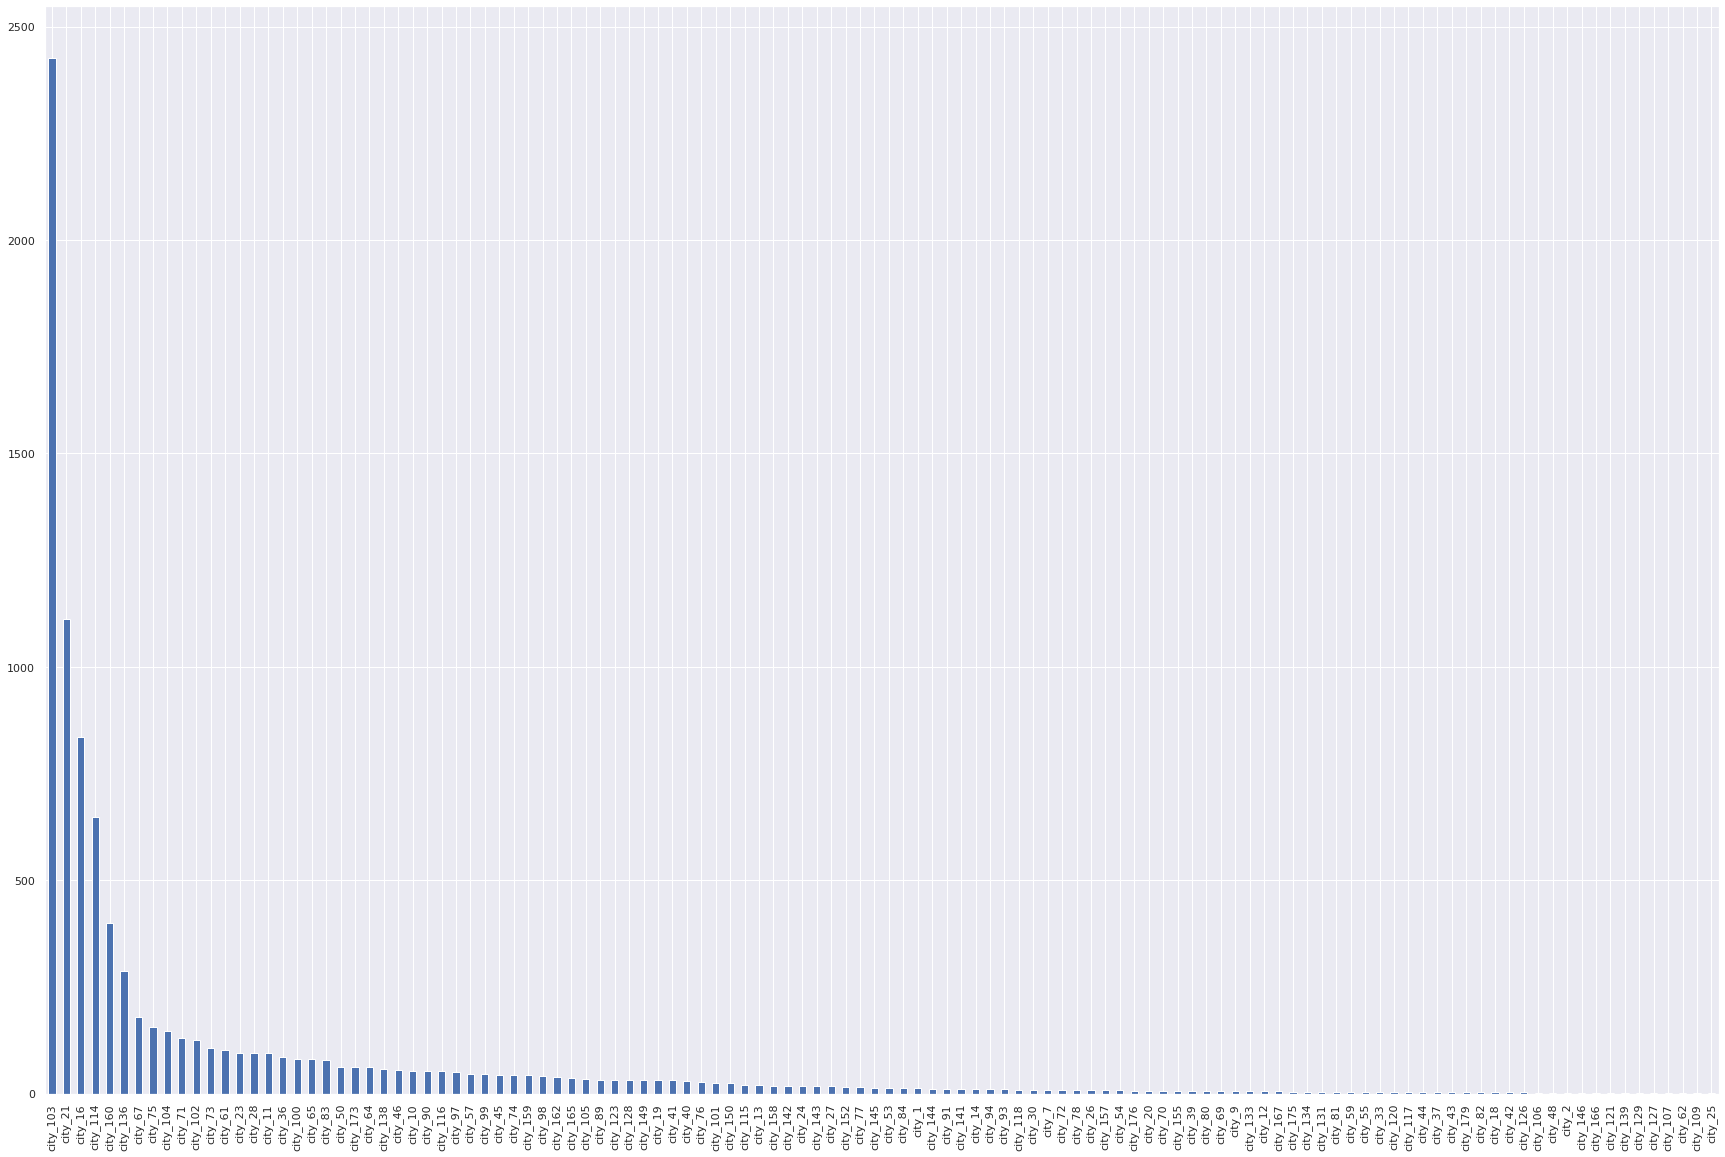

In [277]:
df['city'].value_counts().plot(kind="bar")
sns.set(rc={'figure.figsize':(30,20)})

### 2.1.2 How many rows belong to the count-wise top 4 cities in total and how many for the remaining? (1pt)

In [278]:
print("Top 4 City Count:", df['city'].value_counts()[:4].sum())
print("Other City Count:", df['city'].value_counts()[4:].sum())

Top 4 City Count: 5021
Other City Count: 3934


### 2.1.3 Replace the city name with city_others if the city name is not among the top 4 (1pt)

In [279]:
x = df['city'].value_counts()[4:].apply(lambda x: 'city_others')
df = df.replace(x)

### 2.1.4 Show some sample data that the records have changed correctly. (1pt)

In [280]:
df

,Unnamed: 0,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,1,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,4,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,7,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,11,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,19147,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,19149,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,19150,32313,city_others,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,19152,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0


## 2.2. Preprocessing Education Level (1+2+2+1 = 6pts total)

### 2.2.1. Show the unique values of education level. (1pt)

In [281]:
np.unique(df['education_level'])

array(['Graduate', 'Masters', 'Phd'], dtype=object)

### 2.2.2. Write a function named replace_labels() that can replace labels using given {old_label:new_label} dictionary (2pts)

Parameters: (1) dataframe, (2) a column name, (3) a dictionary with {old_label:new_label} mapping. 

Returns: a dataframe with specified column values replaced with the  


In [282]:
def replace_labels(dataFrame, columnName, dictionary):
  dataFrame[columnName].replace(dictionary, inplace=True)
  return dataFrame

### 2.2.3. Using the replace_labels() function you just created, replace education_level column with ordinal values. The mapping can be like "Graduate":0, "Masters":1, "Phd":2 . (2pt)

In [283]:
dictionary = {"Graduate":0, "Masters":1, "Phd":2}
df= replace_labels(df, 'education_level', dictionary)

### 2.2.4 Show some sample data that the records have changed appropriately (1pt)

In [284]:
df['education_level']

0       0
1       1
2       0
3       0
4       0
       ..
8950    0
8951    1
8952    0
8953    0
8954    0
Name: education_level, Length: 8955, dtype: int64

## 2.3. Preprocessing company_size (2+2+1 = 5pts total)

### 2.3.1 Show the unique values of the company_size column and their counts (2pt)

In [285]:
arr = np.array([np.unique(df['company_size']), np.unique(df['company_size'].value_counts())])
arr

array([['10/49', '100-500', '1000-4999', '10000+', '50-99', '500-999',
        '5000-9999', '<10'],
       [393, 592, 840, 930, 951, 1449, 1814, 1986]], dtype=object)

### 2.3.2 Change the values of the company_size column from 0 to 7 where e0 is <10 and 7 is 10000+. The order of the numbers should be based on the values of the column-like an ordinary variable. (2pt)
(Hint: you can use the replace_labels() function you created before.)

In [286]:
dictionary = {"<10":0, "10/49":1, "50-99":2, "100-500":3, "500-999":4, "1000-4999":5,"5000-9999":6,"10000+":7}
df= replace_labels(df, 'company_size', dictionary)

### 2.3.3 Show the updated unique values to validate they changed appropriately (1pt)

In [287]:
print(np.unique(df['company_size']))
print(np.unique(df['company_size'].value_counts()))
df['company_size']

[0 1 2 3 4 5 6 7]
[ 393  592  840  930  951 1449 1814 1986]


0       2
1       2
2       0
3       2
4       6
       ..
8950    3
8951    2
8952    3
8953    1
8954    2
Name: company_size, Length: 8955, dtype: int64

## 2.4. Preprocessing last_new_job (1+2+1 = 4pts total)

### 2.4.1 Show unique values of the last_new_job column (1pt)

In [288]:
np.unique(df['last_new_job'])

array(['1', '2', '3', '4', '>4', 'never'], dtype=object)

### 2.4.2 Convert the values of this column to never->0, 1->1,....>4 -->5 (2pt)
Hint: replace_labels()

In [289]:
dictionary = {'never':0,'1':1,'2':2,'3':3,'4':4, '>4':5}
df = replace_labels(df, 'last_new_job', dictionary)

### 2.4.3 Show the updated values (1pt)

In [290]:
df['last_new_job']

0       5
1       4
2       5
3       1
4       1
       ..
8950    1
8951    1
8952    3
8953    1
8954    4
Name: last_new_job, Length: 8955, dtype: int64

## 2.5 Preprocessing other columns (2pt total)

### 2.5.1 Drop the enrollee_id, any unnamed columns, and any duplicate columns (if you created multiple columns one with original and one with updated, then remove the original one) (2pt)

In [291]:
df.columns
df = df.drop(['Unnamed: 0', 'enrollee_id'], axis=1)

In [292]:
df.drop_duplicates()
df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

## 2.6 Feature Scaling (3+1 = 4ps total)

### 2.6.1 Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the numeric columns (3pt)

In [293]:
from sklearn.preprocessing import MinMaxScaler
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df2 = df.select_dtypes(include = numerics)

In [294]:
scaler = MinMaxScaler()
df[df2.columns] = scaler.fit_transform(df[df2.columns])

### 2.6.2 Show some of the scaled records. (1pt)

In [295]:
df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_others,0.654691,Male,No relevent experience,no_enrollment,0.0,STEM,0.714286,0.285714,Pvt Ltd,1.0,0.137313,0.0
1,city_others,0.636727,Male,Has relevent experience,no_enrollment,0.5,STEM,1.000000,0.285714,Funded Startup,0.8,0.020896,0.0
2,city_others,0.626747,Male,Has relevent experience,no_enrollment,0.0,STEM,0.619048,0.000000,Pvt Ltd,1.0,0.050746,1.0
3,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.333333,0.285714,Pvt Ltd,0.2,0.134328,1.0
4,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.0,STEM,0.238095,0.857143,Pvt Ltd,0.2,0.319403,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,city_21,0.351297,Male,No relevent experience,Full time course,0.0,STEM,0.047619,0.428571,Pvt Ltd,0.2,0.152239,1.0
8951,city_103,0.942116,Male,Has relevent experience,no_enrollment,0.5,STEM,0.428571,0.285714,Pvt Ltd,0.2,0.104478,1.0
8952,city_others,0.942116,Female,Has relevent experience,no_enrollment,0.0,STEM,0.476190,0.428571,Public Sector,0.6,0.065672,0.0
8953,city_103,0.942116,Female,Has relevent experience,no_enrollment,0.0,Humanities,0.333333,0.142857,Funded Startup,0.2,0.071642,0.0


# 3. X/Y and Training/Test Split with stratified sampling (15pts in total)

### 3.1 Using a lot of features with categorical values is not memory-efficient. Use a LabelEncoder() to convert all the categorical columns to numeric labels. (This task is similar to previous assignment A1) (2pt)

In [296]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df2 = df.select_dtypes(include = object)
for col in df2.columns:
  df[col] = label_encoder.fit_transform(df[col])

### 3.2 Copy all the features into X and the target to Y (2pt)

In [297]:
X = df.loc[:, df.columns!='target']
y = df['target']

### 3.3 Show the ratio of 1 and 0 in Y. (1pt)

In [298]:
ones = sum(y.values == 1)
zeros = sum(y.values == 0)
total = ones + zeros
oneratio = ones/total
zeroratio = zeros/total
print("1s: ", oneratio)
print("0s: ", zeroratio)

1s:  0.16560580681183695
0s:  0.834394193188163


### 3.4 Use sklearn's train_test_split() to split the data set into 70% training and 30% test sets. Set random_state to 42. We want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to Y to ensure this. Then show the ratio of 1 and 0 in both train and test target. (4pt)

In [299]:
from sklearn.model_selection import train_test_split as train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
print("For train")
ones = sum(y_train == 1)
zeros = sum(y_train == 0)
total = ones + zeros
oneratio = ones/total
zeroratio = zeros/total
print("1s: ", oneratio)
print("0s: ", zeroratio)
print("For test")
ones = sum(y_test == 1)
zeros = sum(y_test == 0)
total = ones + zeros
oneratio = ones/total
zeroratio = zeros/total
print("1s: ", oneratio)
print("0s: ", zeroratio)

For train
1s:  0.1656030631780472
0s:  0.8343969368219528
For test
1s:  0.1656122069222181
0s:  0.8343877930777819


### 3.5 Rebalancing (4+2 = 6pts)

3.5.1 Use imblearn's SMOTENC to balance the x_train


When our training set have class imbalance, we often perform over-sampling to generate synthetic data that can help in training. SMOTE is a library by imblearn for this purpose. The usage is fairly straightforward. See documentation [here](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) and a brief explanation with example [here](https://medium.com/analytics-vidhya/smote-nc-in-ml-categorization-models-fo-imbalanced-datasets-8adbdcf08c25)

In [300]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()

3.5.2 Did that change the ratio in label? Confirm by printing the ratio in resampled labels.

In [302]:
X_res, y_res = sm.fit_resample(X_train, y_train)
print(f'Resampled dataset samples per class {Counter(y_res)}')

Resampled dataset samples per class Counter({0.0: 5230, 1.0: 5230})


# 4. Decision Tree (20pts total)

### 4.1 Initialize a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set. Set a consistent value for random_state parameter so that your result is reproducible. (1pt)

In [303]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state = 42)

### 4.2 Use grid search to find out the best combination of values for the parameters: criterion, max_depth, min_samples_split, max_features. Then print the best performing parameters. (4pt)

In [304]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'max_features':['sqrt', 'log2', None],
          'criterion':['gini','entropy']
          }
grid_search = GridSearchCV(estimator=clf, param_grid=params, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3}


### 4.3 Add the best performing parameter set to the already-initialized Decision Tree model. Then fit it on the train dataset. (2pt)

In [305]:
clf = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3,max_features= 'sqrt', min_samples_leaf= 3)

### 4.4 Import the accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score from scikitlearn's metrics package. Evaluate your Decision Tree on the Test dataset and print all the metrics. (3pt)

In [306]:
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import precision_score as precision_score
from sklearn.metrics import recall_score as recall_score
from sklearn.metrics import confusion_matrix as confusion_matrix
from sklearn.metrics import f1_score as f1_score
from sklearn.metrics import roc_auc_score as roc_auc_score

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8585783401563082
Precision: 0.5764705882352941
Recall: 0.550561797752809
[[2062  180]
 [ 200  245]]
f1_score: 0.5632183908045977
roc_auc_score: 0.7351381691707846


### 4.5 Plot the tree using scikitlearn's tree package. You may need to define a large figure size using matplotlib to have an intelligible figure. (2pt)

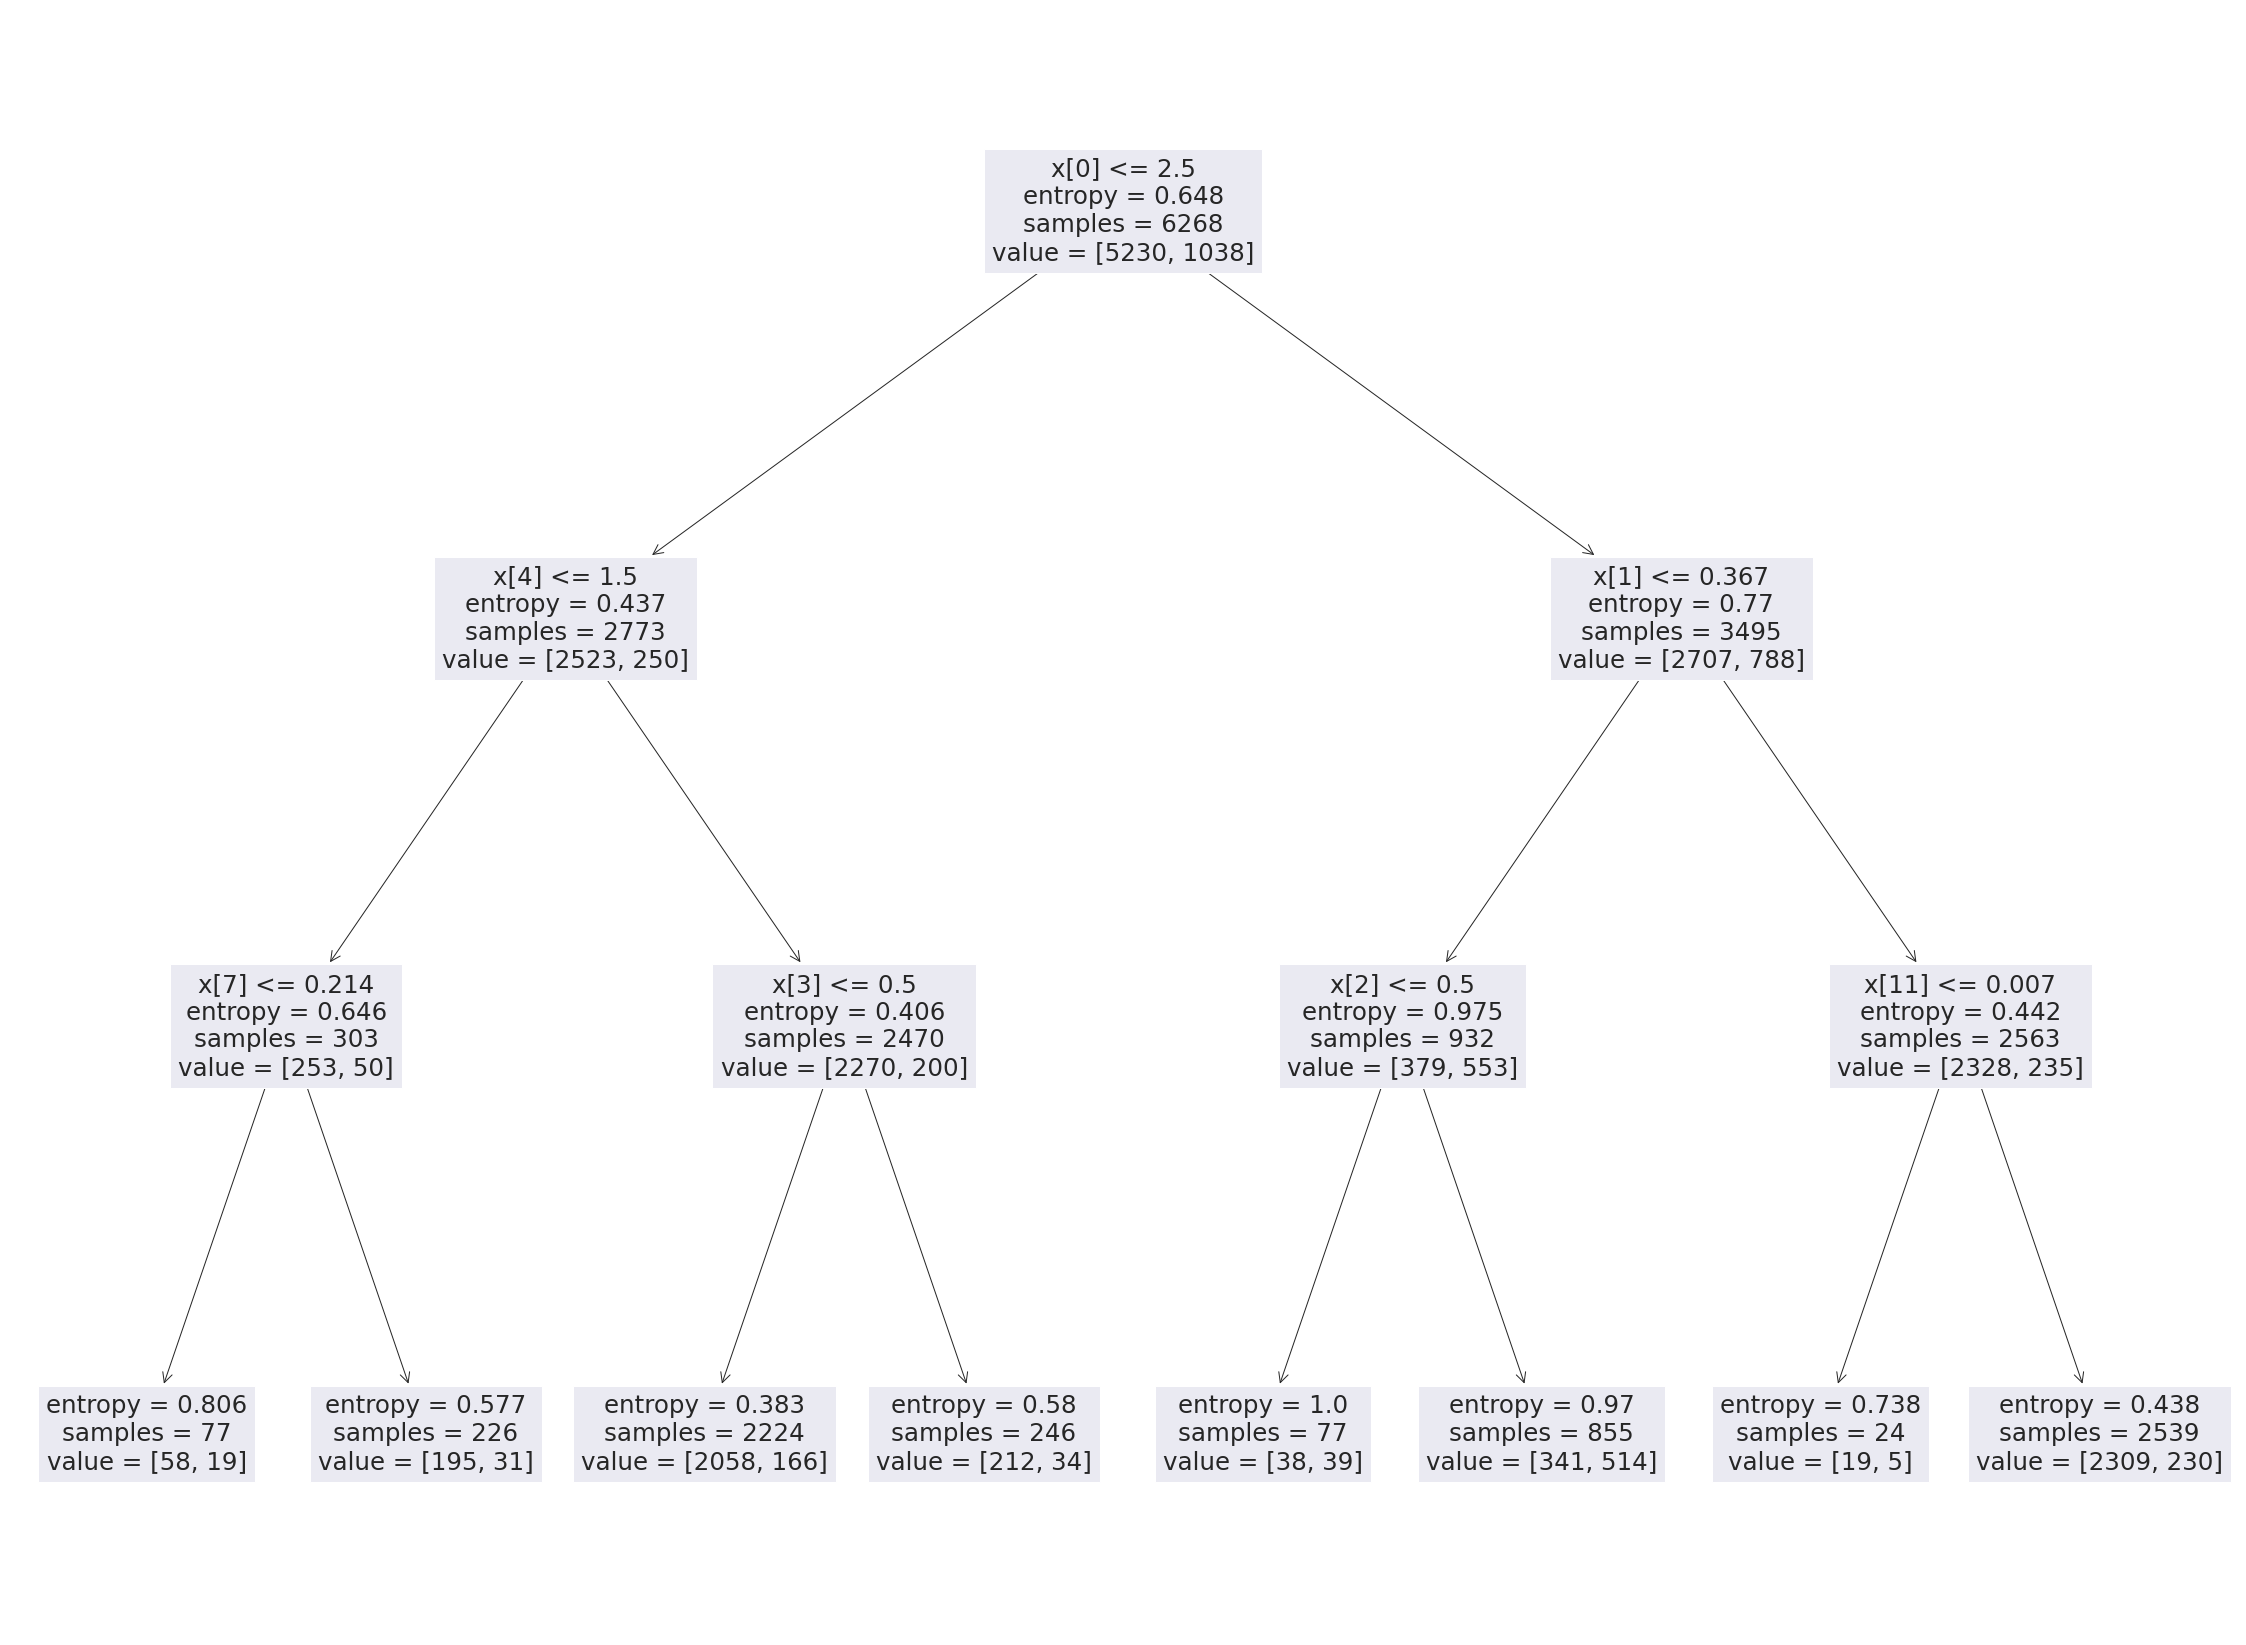

In [307]:
from sklearn import tree
plt.figure(figsize=(40, 30))
tree.plot_tree(clf)
plt.show()

### 4.6 Initialize a new Decision Tree model, then use the best set of parameters from Step 4.3 to train it on the balanced train set that you prepared in Step 3.5.1. (3pt)

In [308]:
DT = DecisionTreeClassifier(criterion = 'entropy',max_depth= 3,max_features= 'sqrt', min_samples_leaf= 3)
DT.fit(X_res, y_res)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt',
                       min_samples_leaf=3)

### 4.7 Print the evaluation scores (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) from the training on balanced dataset. (3pt)

In [309]:
y_pred = DT.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8563453665798288
Precision: 0.5690866510538641
Recall: 0.5460674157303371
[[2058  184]
 [ 202  243]]
f1_score: 0.5573394495412844
roc_auc_score: 0.7319989174994237


### 4.8 Discuss any difference between evaluation results from the unbalanced train set and balanced train set. (2pt)

From what I see from the evaluation results from the unbalanced and balanced, the scores are very similiar. However, the balanced train set had lower scores across all category in accuracy, precision, recall, f1_score, and roc_auc_score. The confusion matrix is very close.

# 5. Random Forest Classifier (12pts total)

### 5.1 Use grid search to find best combinations of the following Random Forest parameters: n_estimators, max_depth, min_samples_split and min_samples_leaf. Use your own choice of scoring, criterion, number of folds for cross-validation for the model initialization. Remember the grid search can take a while to finish. (4pt)

In [310]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf2 = RandomForestClassifier(random_state = 42)

newparams = {'max_depth':[3,5,7],
          'min_samples_leaf':[3,5,10],
          'min_samples_split': [3,5,10],
          'n_estimators':[90, 100, 115],
          'criterion':['gini', 'entropy']
          }
    
grid_searchRando = GridSearchCV(estimator=clf2, param_grid = newparams, cv=3, n_jobs=-1, scoring='accuracy')
grid_searchRando.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [90, 100, 115]},
             scoring='accuracy')

### 5.2 Print the best combination of parameters and use it to train a Random Forest classifier model. (3pt)

In [311]:
print(grid_searchRando.best_params_)
clf2 = RandomForestClassifier(criterion='entropy', max_depth = 7, min_samples_leaf = 5, min_samples_split = 3, n_estimators = 90)
clf2.fit(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 90}


RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       min_samples_split=3, n_estimators=90)

### 5.3  Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (5pt)

In [313]:
y_pred = clf2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8567175288425753
Precision: 0.5789473684210527
Recall: 0.4943820224719101
[[2082  160]
 [ 225  220]]
f1_score: 0.5333333333333333
roc_auc_score: 0.7115085848309595


# 6. Boosting Classifier (20 pts total)

## 6.1 AdaBoost Classifier (10 pts total)

### 6.1.1 Perform a grid search for best values for parameters={n_estimators, learning_rate} of an AdaBoostClassifier and the given training set. (4pt) 

In [314]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
adaparam = {
    'n_estimators':[10, 50, 100, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
}
grid_search = GridSearchCV(estimator=ada, param_grid = adaparam, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 50}

### 6.1.2 Train an AdaboostClassifier using the best parameter set you found in step 6.1.1 (3pt) 

In [316]:
ada = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 50)
ada.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.1)

### 6.1.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [317]:
y_pred = ada.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8582061778935616
Precision: 0.5754716981132075
Recall: 0.5483146067415731
[[2062  180]
 [ 201  244]]
f1_score: 0.5615650172612199
roc_auc_score: 0.7340145736651665


## 6.2 Gradient Boosting Classifier (10 pts total)

### 6.2.1 Perform a grid search for best values for parameters={n_estimators, max_depth, learning_rate} of a GradientBoostingClassifier and the given training set. (4pt)

In [318]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
gbcparam = {
    'n_estimators':[10, 50, 100, 500],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],
    'max_depth':[3,5,7]
}
grid_search = GridSearchCV(estimator=GBC, param_grid = gbcparam, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

### 6.2.2 Train a GradientBoostingClassifier using the best parameter set you found in step 6.2.1 (3pt) 

In [319]:
GBC = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 50, max_depth = 3)
GBC.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

### 6.2.3 Evaluate using the same metrics as before (accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score) (3pt)

In [321]:
y_pred = GBC.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("f1_score:", f1_score(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8582061778935616
Precision: 0.5808080808080808
Recall: 0.5168539325842697
[[2076  166]
 [ 215  230]]
f1_score: 0.5469678953626634
roc_auc_score: 0.7214064488969519


# 7. Summary Discussion (4 pts)

Which model yields the highest precision?
The Gradient Boosting Classifer Model had the highest precision among all the models.


Which model yields the lowest recall? 
RandomForestClassifier Model had the lowest recall out of the models.


Which model yields the higest True Positive (TP)? 
My RandomForest model had the highest True Positive


Which model yields the best performance overall?
I believe the DecisionTreeClassifier had the best performance overall, as it took the least amount of time to run and fit, as well as had the highest roc_score.